In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df_subset.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

2785

In [5]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [6]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [7]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [21]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [22]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 1247296 words in this dataset


### Get child ages

In [23]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [24]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]
transcript_df["age_years"] = transcript_df["age_months"] / 12

In [25]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [26]:
import seaborn as sns
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig
ensure_dir(FIGURE_DIR/ 'distributions')

In [27]:
def quickplot_decay(distances, MI, shuff_MI, title=''):
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.set_title(title)
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()

In [28]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

In [40]:
from childes_mi.information_theory import mutual_information as mi

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.expected_mutual_info_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


1 1.5


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1407 out of 1407 | elapsed:    0.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 216 out of 1407 | elapsed:    0.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 1407 out of 1407 | elapsed:    0.3s finished


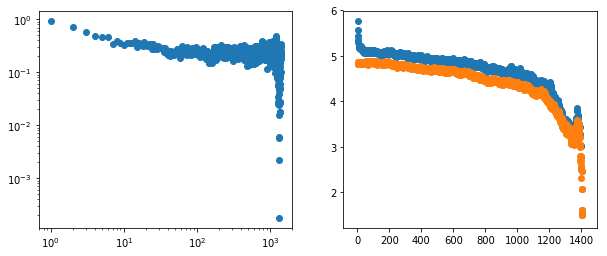

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 823 out of 823 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 823 out of 823 | elapsed:    0.3s finished


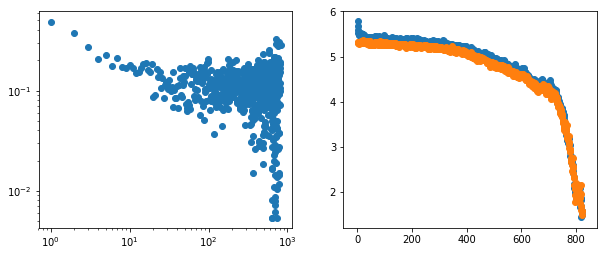

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 772 out of 772 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 772 out of 772 | elapsed:    0.2s finished


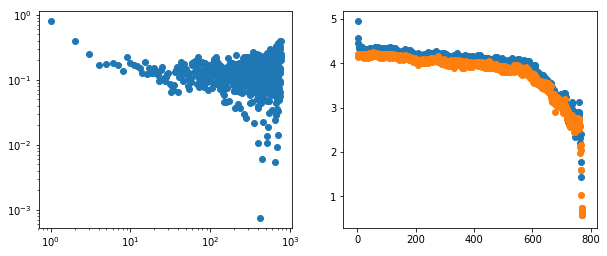

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 511 out of 511 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of 511 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 511 out of 511 | elapsed:    0.2s finished


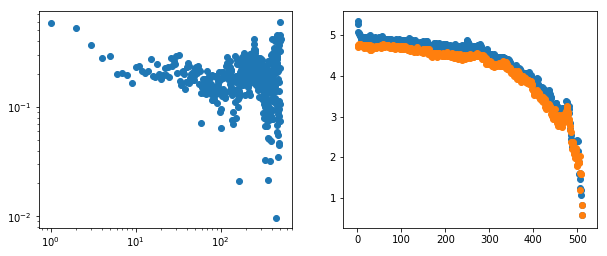

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of 467 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 467 out of 467 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of 467 | elapsed:    0.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 467 out of 467 | elapsed:    0.1s finished


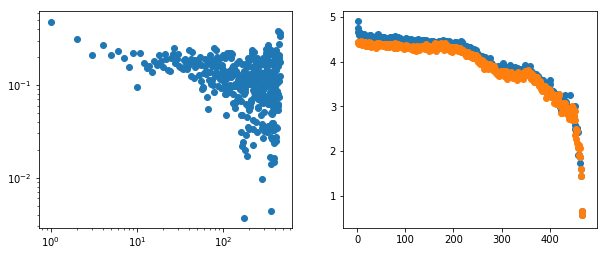

1.5 2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2493 out of 2493 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1432 out of 2493 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 2493 out of 2493 | elapsed:    0.6s finished


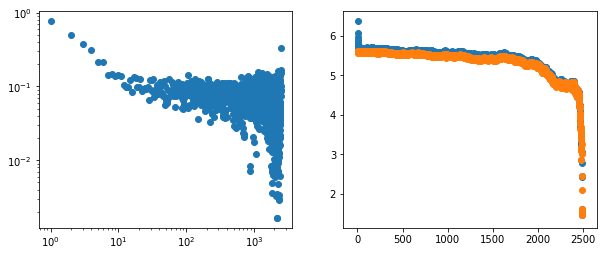

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2113 out of 2113 | elapsed:    0.5s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2113 out of 2113 | elapsed:    0.5s finished


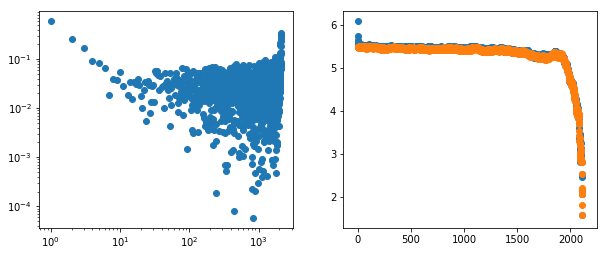

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1599 out of 1599 | elapsed:    0.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1599 out of 1599 | elapsed:    0.3s finished


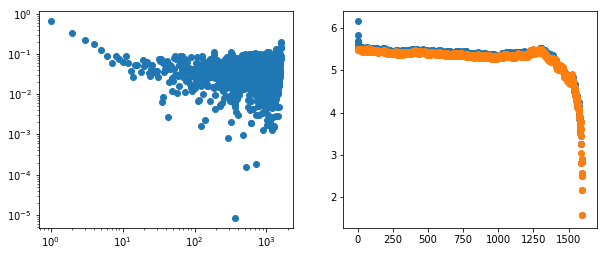

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1529 out of 1529 | elapsed:    0.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1529 out of 1529 | elapsed:    0.4s finished


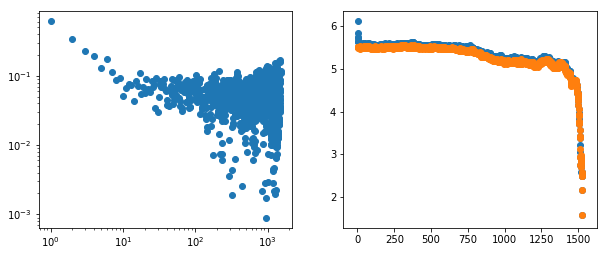

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1526 out of 1526 | elapsed:    0.5s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1526 out of 1526 | elapsed:    0.4s finished


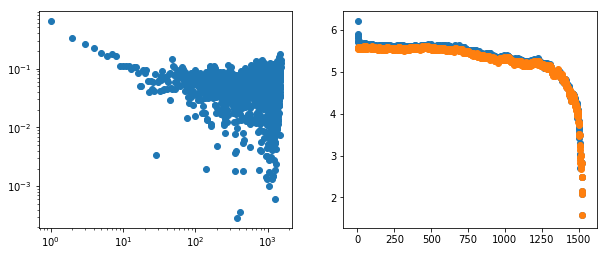

2 2.5


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 3363 out of 3363 | elapsed:    1.0s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3363 out of 3363 | elapsed:    1.0s finished


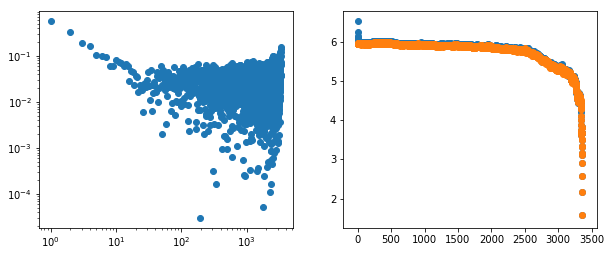

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2901 out of 2901 | elapsed:    0.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1676 out of 2901 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 2901 out of 2901 | elapsed:    0.7s finished


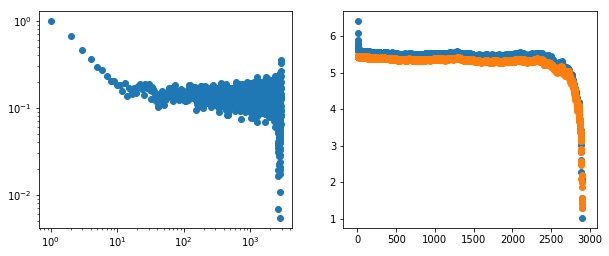

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2801 out of 2801 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2801 out of 2801 | elapsed:    0.7s finished


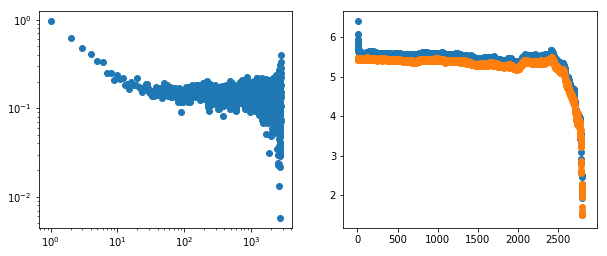

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2713 out of 2713 | elapsed:    0.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2713 out of 2713 | elapsed:    0.7s finished


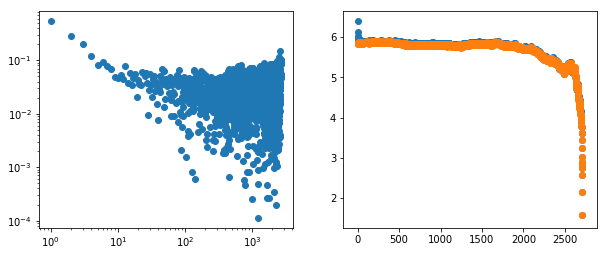

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2585 out of 2585 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2585 out of 2585 | elapsed:    0.6s finished


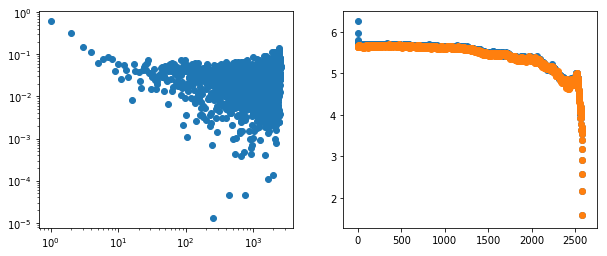

2.5 3


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3678 out of 3678 | elapsed:    1.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3678 out of 3678 | elapsed:    1.1s finished


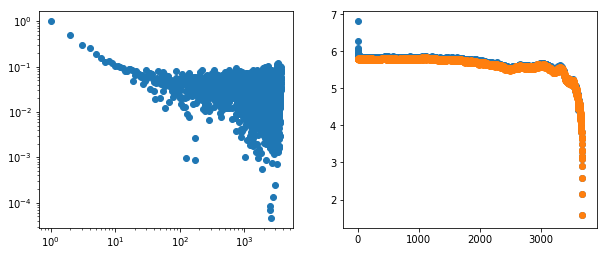

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 3677 out of 3677 | elapsed:    1.0s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 3677 out of 3677 | elapsed:    1.0s finished


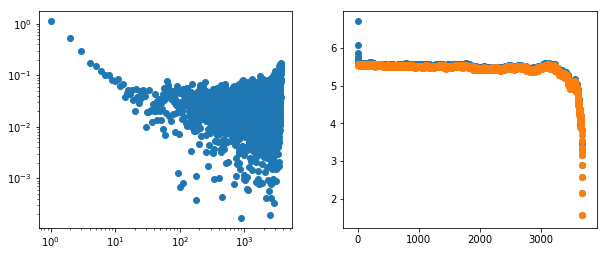

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2080 out of 2680 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2680 out of 2680 | elapsed:    0.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2680 out of 2680 | elapsed:    0.7s finished


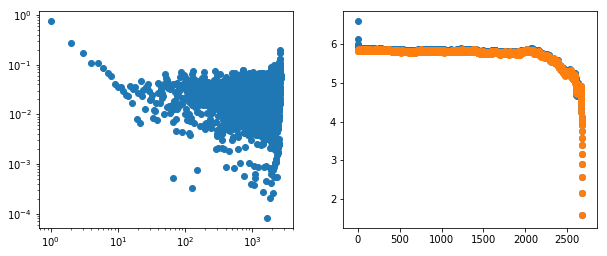

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2658 out of 2658 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2658 out of 2658 | elapsed:    0.7s finished


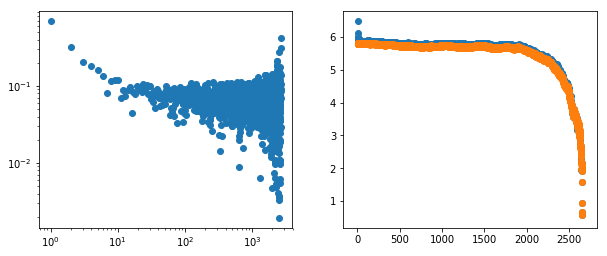

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2604 out of 2604 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2604 out of 2604 | elapsed:    0.6s finished


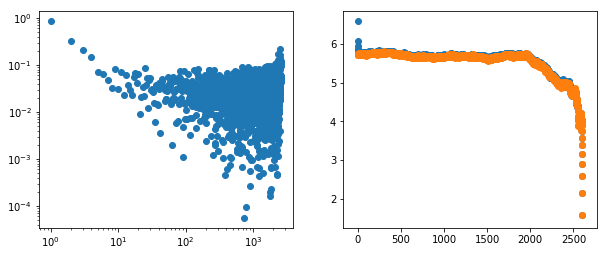

3 20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 4588 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 8044 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 10096 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 12364 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 14848 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 17548 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 20464 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 23596 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 26939 out

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2144 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 3080 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 4160 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 6752 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 8264 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 9920 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 11720 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 13664 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 15752 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 17984 tasks  

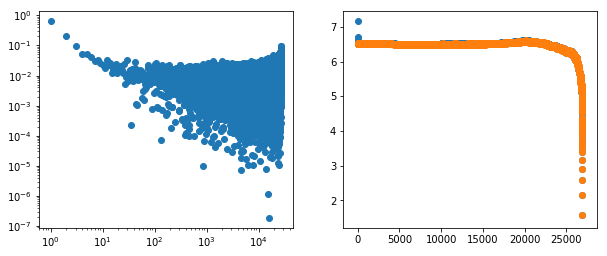

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 4588 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 8044 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 10096 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 12364 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 14848 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 17548 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 21417 out of 21417 | elapsed:   23.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2144 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 3080 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 4160 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 6752 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 8264 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 9920 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 11720 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 13664 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 16580 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 21417 out of 

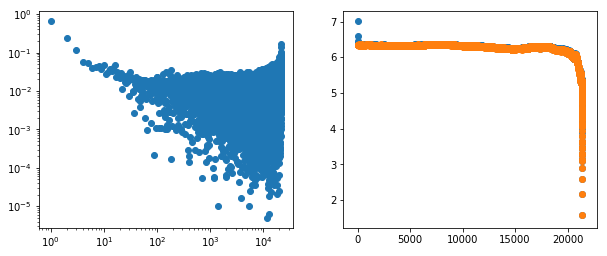

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 4224 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 6096 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 8256 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 10704 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 13440 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 16464 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 19901 out of 19901 | elapsed:   19.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4588 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 8044 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 10096 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 12364 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 14848 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 18802 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 19901 out of 19901 | elapsed:   20.1s finished


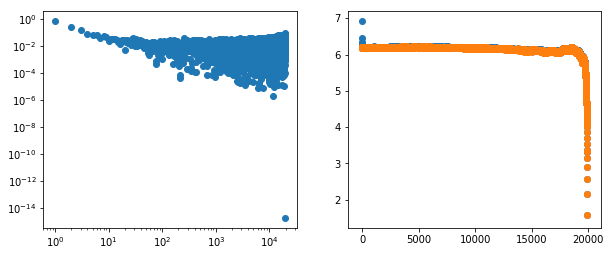

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 4588 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 6208 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 8044 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 10096 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 12502 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 15608 out of 15608 | elapsed:   13.8s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 4224 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 6096 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 8256 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 10704 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 13440 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 15608 out of 15608 | elapsed:   14.0s finished


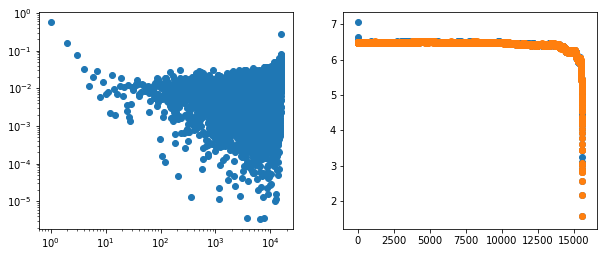

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 5217 out of 5217 | elapsed:    1.8s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 5217 out of 5217 | elapsed:    1.8s finished


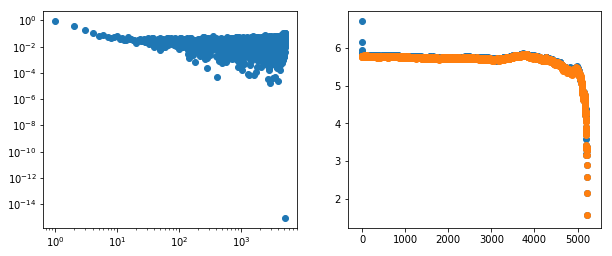

In [42]:
nex = 5

MI_DF_long = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_phones",
        "n_unique_phones",
        "age",
        "dataset",
        "xml_loc",
        "n_words",  
        "words_list"
    ]
)
    # for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):# [::-1]
    cohort_subset = transcript_df[
        (transcript_df.age_years > age_cohort_low) & (transcript_df.age_years <= age_cohort_high)
    ]
    print(age_cohort_low, age_cohort_high)
    for idx, longest_row in tqdm(cohort_subset.sort_values(by='n_words', ascending=False)[:nex].iterrows(), total=nex):
        words_list = list(flatten([i for i in flatten(longest_row.words) if i is not None]))
    
        n_words = len(words_list)
        n_unique_words = len(np.unique(words_list))
        
        distances = np.arange(1, n_words - 1)
        (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information([list(words_list)],  
                                                                                  distances = distances, n_jobs=-1)
                
        quickplot_decay(distances, MI, shuff_MI, title='')
        
        MI_DF_long.loc[len(MI_DF_long)] = [
            MI,
            MI_var,
            shuff_MI,
            shuff_MI_var,
            distances,
            age_cohort_low,
            age_cohort_high,
            n_words,
            n_unique_words,
            longest_row.age,
            longest_row.corpus,
            longest_row.transcript_xml,
            longest_row.n_words,
            words_list
            
        ]

In [43]:
MI_DF_long.to_pickle(DATA_DIR/'mi/childes_longest_seqs.pickle')